In [104]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import os
os.getcwd()
df_hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [103]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Датасет проверен на наличие пустых значений. Пустых значений не обнаружено.

In [105]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000,1470.000
mean,36.924,802.486,9.193,2.913,1.000,1024.865,2.722,65.891,2.730,2.064,2.729,6502.931,14313.103,2.693,15.210,3.154,2.712,80.000,0.794,11.280,2.799,2.761,7.008,4.229,2.188,4.123
std,9.135,403.509,8.107,1.024,0.000,602.024,1.093,20.329,0.712,1.107,1.103,4707.957,7117.786,2.498,3.660,0.361,1.081,0.000,0.852,7.781,1.289,0.706,6.127,3.623,3.222,3.568
min,18.000,102.000,1.000,1.000,1.000,1.000,1.000,30.000,1.000,1.000,1.000,1009.000,2094.000,0.000,11.000,3.000,1.000,80.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,30.000,465.000,2.000,2.000,1.000,491.250,2.000,48.000,2.000,1.000,2.000,2911.000,8047.000,1.000,12.000,3.000,2.000,80.000,0.000,6.000,2.000,2.000,3.000,2.000,0.000,2.000
50%,36.000,802.000,7.000,3.000,1.000,1020.500,3.000,66.000,3.000,2.000,3.000,4919.000,14235.500,2.000,14.000,3.000,3.000,80.000,1.000,10.000,3.000,3.000,5.000,3.000,1.000,3.000
75%,43.000,1157.000,14.000,4.000,1.000,1555.750,4.000,83.750,3.000,3.000,4.000,8379.000,20461.500,4.000,18.000,3.000,4.000,80.000,1.000,15.000,3.000,3.000,9.000,7.000,3.000,7.000
max,60.000,1499.000,29.000,5.000,1.000,2068.000,4.000,100.000,4.000,5.000,4.000,19999.000,26999.000,9.000,25.000,4.000,4.000,80.000,3.000,40.000,6.000,4.000,40.000,18.000,15.000,17.000


In [106]:
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000,0.011,-0.002,0.208,NaN,-0.010,0.010,0.024,0.030,0.510,-0.005,0.498,0.028,0.300,0.004,0.002,0.054,NaN,0.038,0.680,-0.020,-0.021,0.311,0.213,0.217,0.202
DailyRate,0.011,1.000,-0.005,-0.017,NaN,-0.051,0.018,0.023,0.046,0.003,0.031,0.008,-0.032,0.038,0.023,0.000,0.008,NaN,0.042,0.015,0.002,-0.038,-0.034,0.010,-0.033,-0.026
DistanceFromHome,-0.002,-0.005,1.000,0.021,NaN,0.033,-0.016,0.031,0.009,0.005,-0.004,-0.017,0.027,-0.029,0.040,0.027,0.007,NaN,0.045,0.005,-0.037,-0.027,0.010,0.019,0.010,0.014
Education,0.208,-0.017,0.021,1.000,NaN,0.042,-0.027,0.017,0.042,0.102,-0.011,0.095,-0.026,0.126,-0.011,-0.025,-0.009,NaN,0.018,0.148,-0.025,0.010,0.069,0.060,0.054,0.069
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010,-0.051,0.033,0.042,NaN,1.000,0.018,0.035,-0.007,-0.019,-0.046,-0.015,0.013,-0.001,-0.013,-0.020,-0.070,NaN,0.062,-0.014,0.024,0.010,-0.011,-0.008,-0.009,-0.009
EnvironmentSatisfaction,0.010,0.018,-0.016,-0.027,NaN,0.018,1.000,-0.050,-0.008,0.001,-0.007,-0.006,0.038,0.013,-0.032,-0.030,0.008,NaN,0.003,-0.003,-0.019,0.028,0.001,0.018,0.016,-0.005
HourlyRate,0.024,0.023,0.031,0.017,NaN,0.035,-0.050,1.000,0.043,-0.028,-0.071,-0.016,-0.015,0.022,-0.009,-0.002,0.001,NaN,0.050,-0.002,-0.009,-0.005,-0.020,-0.024,-0.027,-0.020
JobInvolvement,0.030,0.046,0.009,0.042,NaN,-0.007,-0.008,0.043,1.000,-0.013,-0.021,-0.015,-0.016,0.015,-0.017,-0.029,0.034,NaN,0.022,-0.006,-0.015,-0.015,-0.021,0.009,-0.024,0.026
JobLevel,0.510,0.003,0.005,0.102,NaN,-0.019,0.001,-0.028,-0.013,1.000,-0.002,0.950,0.040,0.143,-0.035,-0.021,0.022,NaN,0.014,0.782,-0.018,0.038,0.535,0.389,0.354,0.375


In [ ]:
#Логичным выглядят взаимосвязи между факторами TotalWorkingYears и Age,Job Level; Job Level и MonthlyIncome,TotalWorkingYears; SalaryHike и PerformanceRating;  YearsAtCompany и взаимосвязанными показателями YearsInCurrentRole, CurrentManager и проч. 

In [107]:
df_hr['Department'].nunique()

3

In [108]:
df_hr['EducationField'].nunique()

6

In [109]:
df_hr['JobRole'].nunique()

9

In [110]:
df_hr['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [111]:
df_hr['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [112]:
df_hr['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [ ]:
#Узанаем кол-во департаментов, сфер образования, из которых приходят сотрудники, должностей - что дает нам сделать выводы о том, что компания специализируется на разработке и продаже товаров, связанных со здравоохранением (возможно фарм компания). 

<AxesSubplot:xlabel='MonthlyIncome'>

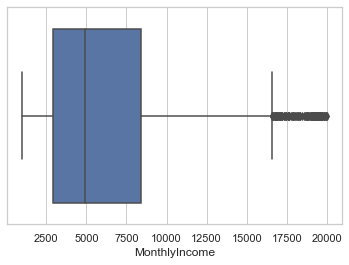

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.boxplot(x=df_hr["MonthlyIncome"])

In [ ]:
#распределение несколько смещенное

Text(0, 0.5, 'Amount of employees')

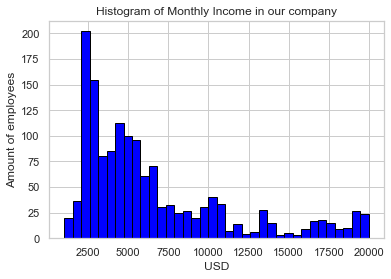

In [114]:
# matplotlib histogram
plt.hist(df_hr['MonthlyIncome'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Monthly Income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [115]:
import numpy as np
np.mean(df_hr.MonthlyIncome)

6502.931292517007

In [116]:
np.median(df_hr.MonthlyIncome)

4919.0

In [117]:
np.var(df_hr.MonthlyIncome)

22149778.937456165

In [118]:
np.std(df_hr.MonthlyIncome)

4706.355164823004

In [119]:
5*np.std(df_hr.MonthlyIncome)

23531.775824115022

In [120]:
df_hr_g1 = df_hr[df_hr['Gender'] == 'Female']
df_hr_g0 = df_hr[df_hr['Gender'] == "Male"]
df_hr_g1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,Y,Yes,12,3,4,80,0,10,3,3,9,5,0,8
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,2,Female,51,4,3,Manufacturing Director,1,Divorced,9980,10195,1,Y,No,11,3,3,80,1,10,1,3,10,9,8,8


In [121]:
df_hr_g0.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0


In [122]:
print("Count of Gender = 'Female'\
 is {} and for Gender = 'Male' is {}".format(len(df_hr_g1),
                                           len(df_hr_g0)))

Count of Gender = 'Female' is 588 and for Gender = 'Male' is 882


In [123]:
print("Median of Monthly Income for Gender = 'Female' \
is {} and for Gender = 'Male' is {}".format(np.median(df_hr_g1.MonthlyIncome),
                                           np.median(df_hr_g0.MonthlyIncome)))

Median of Monthly Income for Gender = 'Female' is 5081.5 and for Gender = 'Male' is 4837.5


<AxesSubplot:xlabel='MonthlyIncome'>

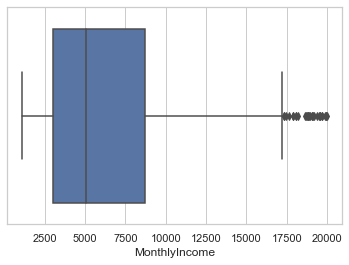

In [124]:
sns.boxplot(x=df_hr_g1['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyIncome'>

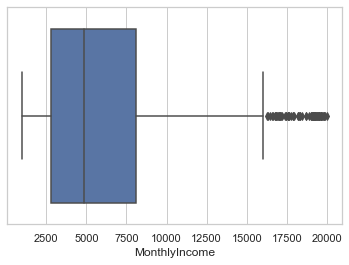

In [125]:
sns.boxplot(x=df_hr_g0['MonthlyIncome'])

Text(0, 0.5, 'Amount of employees')

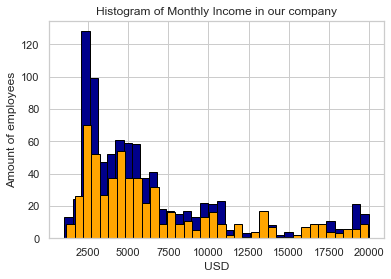

In [126]:
plt.hist(df_hr_g0['MonthlyIncome'], color = 'darkblue', edgecolor = 'black',
         bins = int(180/5))

plt.hist(df_hr_g1['MonthlyIncome'], color = 'orange', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Monthly Income in our company')
plt.xlabel('USD')
plt.ylabel('Amount of employees')

In [127]:
df_hr['anomally_income'] = np.where(
                            df_hr['MonthlyIncome'] > 
                            np.mean(df_hr.MonthlyIncome) + 2*np.std(df_hr.MonthlyIncome),                 
                            1, 0)
df_anomally_income = df_hr[df_hr['anomally_income'] == 1]

df_anomally_income

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_income
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,3,Female,58,3,5,Manager,3,Divorced,19094,10735,4,Y,No,11,3,4,80,1,26,3,2,14,13,4,8,1
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,2,Female,83,3,5,Manager,1,Single,18947,22822,3,Y,No,12,3,4,80,0,22,2,2,2,2,2,1,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,1
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Y,Yes,12,3,4,80,1,29,2,2,27,3,13,8,1
105,59,No,Non-Travel,1420,Human Resources,2,4,Human Resources,1,140,3,Female,32,2,5,Manager,4,Married,18844,21922,9,Y,No,21,4,4,80,1,30,3,3,3,2,2,2,1
106,50,No,Travel_Frequently,1115,Research & Development,1,3,Life Sciences,1,141,1,Female,73,3,5,Research Director,2,Married,18172,9755,3,Y,Yes,19,3,1,80,0,28,1,2,8,3,0,7,1
112,54,No,Non-Travel,142,Human Resources,26,3,Human Resources,1,148,4,Female,30,4,4,Manager,4,Single,17328,13871,2,Y,Yes,12,3,3,80,0,23,3,3,5,3,4,4,1
119,43,No,Travel_Frequently,394,Sales,26,2,Life Sciences,1,158,3,Male,92,3,4,Manager,4,Married,16959,19494,1,Y,Yes,12,3,4,80,2,25,3,4,25,12,4,12,1
123,51,No,Travel_Rarely,684,Research & Development,6,3,Life Sciences,1,162,1,Male,51,3,5,Research Director,3,Single,19537,6462,7,Y,No,13,3,3,80,0,23,5,3,20,18,15,15,1
147,41,No,Travel_Frequently,857,Research & Development,10,3,Life Sciences,1,199,4,Male,91,2,4,Manager,1,Divorced,17181,12888,4,Y,No,13,3,2,80,1,21,2,2,7,6,7,7,1


In [ ]:
#В компании наблюдается значительная связь между уровнем з/п и количеством отработанных лет в этой компании, все сотрудники с высокой З/П проработали более 18 лет. 

(array([215., 255., 306., 166., 162., 152.,  38.,  38.,  21.,  24.,  41.,
         17.,  10.,   6.,   2.,   4.,   8.,   1.,   3.,   1.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28., 30., 32., 34., 36., 38., 40.]),
 <BarContainer object of 20 artists>)

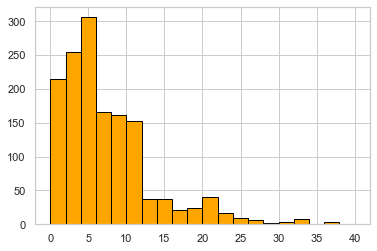

In [128]:
plt.hist(df_hr['YearsAtCompany'], color = 'orange', edgecolor = 'black', bins = 20)

In [137]:
df_hr.YearsAtCompany.quantile(q=0.95)

20.0

(array([210., 198., 209.,   0., 201., 101.,   0.,  78.,  82.,   0.,  89.,
         76.,  55.,   0.,  48.,  56.,   0.,  28.,  21.,  18.]),
 array([11. , 11.7, 12.4, 13.1, 13.8, 14.5, 15.2, 15.9, 16.6, 17.3, 18. ,
        18.7, 19.4, 20.1, 20.8, 21.5, 22.2, 22.9, 23.6, 24.3, 25. ]),
 <BarContainer object of 20 artists>)

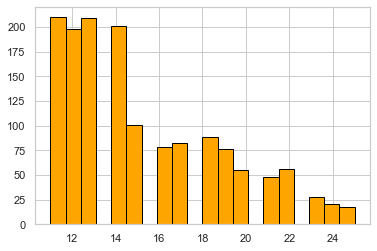

In [100]:
plt.hist(df_hr['PercentSalaryHike'], color = 'orange', edgecolor = 'black', bins = 20)

In [136]:
df_hr.PercentSalaryHike.quantile(q=0.95)

22.0

In [138]:
df_hr_ab = df_hr[df_hr['YearsAtCompany'] > 20]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_income
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,1,Female,78,2,4,Manager,4,Married,15427,22021,2,Y,No,16,3,3,80,0,31,3,3,25,8,3,7,0
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,1,Female,42,2,3,Healthcare Representative,4,Married,10248,2094,3,Y,No,14,3,4,80,1,24,4,3,22,6,5,17,0
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,2,Female,49,3,5,Research Director,3,Married,19545,16280,1,Y,No,12,3,4,80,0,23,0,3,22,15,15,8,1
62,50,No,Travel_Rarely,989,Research & Development,7,2,Medical,1,80,2,Female,43,2,5,Research Director,3,Divorced,18740,16701,5,Y,Yes,12,3,4,80,1,29,2,2,27,3,13,8,1
63,59,No,Travel_Rarely,1435,Sales,25,3,Life Sciences,1,81,1,Female,99,3,3,Sales Executive,1,Single,7637,2354,7,Y,No,11,3,4,80,0,28,3,2,21,16,7,9,0
90,40,No,Travel_Frequently,530,Research & Development,1,4,Life Sciences,1,119,3,Male,78,2,4,Healthcare Representative,2,Married,13503,14115,1,Y,No,22,4,4,80,1,22,3,2,22,3,11,11,0
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,13872,24409,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8,0
119,43,No,Travel_Frequently,394,Sales,26,2,Life Sciences,1,158,3,Male,92,3,4,Manager,4,Married,16959,19494,1,Y,Yes,12,3,4,80,2,25,3,4,25,12,4,12,1
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,4,Female,94,3,3,Healthcare Representative,4,Married,10312,3465,1,Y,No,12,3,4,80,1,40,3,2,40,10,15,6,0
178,46,No,Travel_Rarely,526,Sales,1,2,Marketing,1,244,2,Female,92,3,3,Sales Executive,1,Divorced,10453,2137,1,Y,No,25,4,3,80,3,24,2,3,24,13,15,7,0


In [139]:
df_hr_ab = df_hr[df_hr['PercentSalaryHike'] > 22]
df_hr_ab

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,anomally_income
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,1,27,3,Male,82,2,1,Sales Representative,1,Single,3407,6986,7,Y,No,23,4,2,80,0,10,4,3,5,3,0,3,0
44,30,No,Travel_Frequently,721,Research & Development,1,2,Medical,1,57,3,Female,58,3,2,Laboratory Technician,4,Single,4011,10781,1,Y,No,23,4,4,80,0,12,2,3,12,8,3,7,0
71,29,No,Travel_Rarely,1328,Research & Development,2,3,Life Sciences,1,94,3,Male,76,3,1,Research Scientist,2,Married,2703,4956,0,Y,No,23,4,4,80,1,6,3,3,5,4,0,4,0
75,31,No,Travel_Rarely,746,Research & Development,8,4,Life Sciences,1,98,3,Female,61,3,2,Manufacturing Director,4,Single,4424,20682,1,Y,No,23,4,4,80,0,11,2,3,11,7,1,8,0
87,51,No,Travel_Rarely,432,Research & Development,9,4,Life Sciences,1,116,4,Male,96,3,1,Laboratory Technician,4,Married,2075,18725,3,Y,No,23,4,2,80,2,10,4,3,4,2,0,3,0
111,34,Yes,Travel_Frequently,658,Research & Development,7,3,Life Sciences,1,147,1,Male,66,1,2,Laboratory Technician,3,Single,6074,22887,1,Y,Yes,24,4,4,80,0,9,3,3,9,7,0,6,0
120,30,No,Travel_Frequently,1312,Research & Development,23,3,Life Sciences,1,159,1,Male,96,1,1,Research Scientist,3,Divorced,2613,22310,1,Y,No,25,4,3,80,3,10,2,2,10,7,0,9,0
134,26,No,Travel_Rarely,1355,Human Resources,25,1,Life Sciences,1,177,3,Female,61,3,1,Human Resources,3,Married,2942,8916,1,Y,No,23,4,4,80,1,8,3,3,8,7,5,7,0
160,22,No,Travel_Rarely,1256,Research & Development,19,1,Medical,1,217,3,Male,80,3,1,Research Scientist,4,Married,2323,11992,1,Y,No,24,4,1,80,2,2,6,3,2,2,2,2,0


In [ ]:
#Выводы - компания, базирующаяся на разработке и продаже медицинских товаров. Численность 1470 чел. 
#Компания работает над сохранением талантов, наблюдается высокая связь C&B с выслугой лет в компании и довольно большое кол-во сотрудников проработали в компании более 20 лет.  отражается на повышении зарплаты.
#Также наблюдается связь между эффективностью и количеством лет в компании, что в т.ч.
#Наблюдается перевес мужчин в численности 882 и 588 соответственно, средний доход в месяц у женщин выше, чем у мужчин